In [1]:
# Tensorflow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models


#helper Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



print(tf.__version__)

2.6.2


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [8]:
train_labels[0]

9

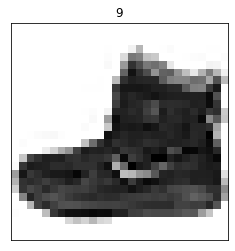

In [9]:
plt.imshow(train_images[0],cmap='gray_r')
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.title(train_labels[0])
plt.show()

In [10]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [11]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [12]:
train_images.shape[0]
# (60000,28,28) ---------> (60000,28,28,1) here 1 means num of channel

60000

In [13]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
# Normalizing
train_images /= 255
test_images /= 255

In [14]:
train_images.shape

(60000, 28, 28, 1)

In [15]:
test_images.shape

(10000, 28, 28, 1)

In [16]:
train_images[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [17]:
train_images.shape # 60000,28,28,1 

(60000, 28, 28, 1)

In [18]:
train_images[0].shape # 28,28,1

(28, 28, 1)

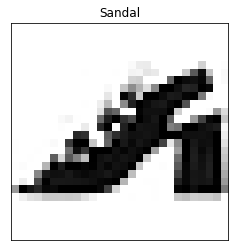

In [19]:
plt.imshow(train_images[4557],cmap='gray_r')
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.title(class_names[train_labels[4557]])
plt.show()

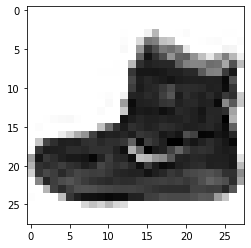

In [20]:
plt.imshow(train_images[0],cmap='gray_r')

In [21]:
# CNN
model = models.Sequential()
model.add(layers.Conv2D(28,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(56,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(56,(3,3),activation='relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 56)        14168     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 56)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 56)          28280     
Total params: 42,728
Trainable params: 42,728
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 56)        14168     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 56)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 56)          28280     
_________________________________________________________________
flatten (Flatten)            (None, 504)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [23]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [24]:
history = model.fit(train_images,train_labels,epochs=10,batch_size=10,validation_split=0.2)


Epoch 1/10


C:\Users\MEGHAVI COMPUTERS\.conda\envs\deepl\lib\site-packages\keras\backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


4800/4800 [==============================] - 68s 14ms/step - loss: 0.4890 - accuracy: 0.8174 - val_loss: 0.3521 - val_accuracy: 0.8742
Epoch 2/10
4800/4800 [==============================] - 67s 14ms/step - loss: 0.3178 - accuracy: 0.8826 - val_loss: 0.3059 - val_accuracy: 0.8878
Epoch 3/10
4800/4800 [==============================] - 67s 14ms/step - loss: 0.2707 - accuracy: 0.8986 - val_loss: 0.2951 - val_accuracy: 0.8961
Epoch 4/10
4800/4800 [==============================] - 67s 14ms/step - loss: 0.2424 - accuracy: 0.9106 - val_loss: 0.2743 - val_accuracy: 0.9002
Epoch 5/10
4800/4800 [==============================] - 66s 14ms/step - loss: 0.2215 - accuracy: 0.9177 - val_loss: 0.2725 - val_accuracy: 0.9012
Epoch 6/10
4800/4800 [==============================] - 67s 14ms/step - loss: 0.2006 - accuracy: 0.9246 - val_loss: 0.2623 - val_accuracy: 0.9070
Epoch 7/10
4800/4800 [==============================] - 68s 14ms/step - loss: 0.1860 - accuracy: 0.9294 - val_loss: 0.2814 - val_accura

In [25]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 4s 11ms/step - loss: 0.3176 - accuracy: 0.9017


[0.31757789850234985, 0.9017000198364258]

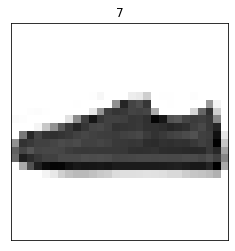

In [26]:
plt.imshow(test_images[597],cmap='gray_r')
plt.grid(False)
plt.title(test_labels[597])
plt.xticks([])
plt.yticks([])
plt.show()

In [27]:
model.predict(test_images[597].reshape(1,28,28,1))

array([[5.0945668e-13, 8.4953501e-14, 4.0600696e-13, 2.8540685e-12,
        2.7506648e-11, 1.7790752e-07, 2.1545201e-12, 9.9999976e-01,
        1.0655705e-12, 1.7003890e-07]], dtype=float32)

In [28]:
model.predict(test_images[597].reshape(1,28,28,1)).round(2)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)